In [5]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Randomized Searching
======================

In [11]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.svm import SVC

In [12]:
from scipy.stats import expon

(array([ 511.,  251.,  108.,   64.,   34.,   17.,    4.,    6.,    4.,    1.]),
 array([  1.59765486e-03,   6.94920537e-01,   1.38824342e+00,
          2.08156630e+00,   2.77488919e+00,   3.46821207e+00,
          4.16153495e+00,   4.85485783e+00,   5.54818072e+00,
          6.24150360e+00,   6.93482648e+00]),
 <a list of 10 Patch objects>)

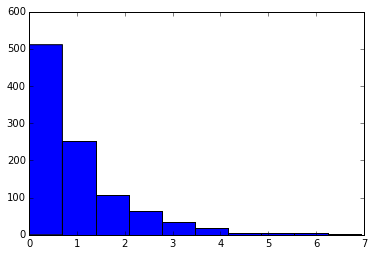

In [13]:
plt.hist([expon.rvs() for x in xrange(1000)])

In [14]:
params = {'C': expon(), 'gamma': expon()}
rs = RandomizedSearchCV(SVC(), param_distributions=params, n_iter=50, verbose=3)

In [15]:
rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.774100313833, gamma=1.64896061995 ...........................
[CV] .. C=0.774100313833, gamma=1.64896061995, score=0.106430 -   0.2s
[CV] C=0.774100313833, gamma=1.64896061995 ...........................
[CV] .. C=0.774100313833, gamma=1.64896061995, score=0.106667 -   0.2s
[CV] C=0.774100313833, gamma=1.64896061995 ...........................
[CV] .. C=0.774100313833, gamma=1.64896061995, score=0.105381 -   0.2s
[CV] C=1.66822958939, gamma=0.717221282329 ...........................
[CV] .. C=1.66822958939, gamma=0.717221282329, score=0.106430 -   0.2s
[CV] C=1.66822958939, gamma=0.717221282329 ...........................
[CV] .. C=1.66822958939, gamma=0.717221282329, score=0.106667 -   0.2s
[CV] C=1.66822958939, gamma=0.717221282329 ...........................
[CV] .. C=1.66822958939, gamma=0.717221282329, score=0.105381 -   0.2s
[CV] C=0.355747509034, gamma=0.0428804977928 .........................
[CV]  C=0.35574

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:    6.2s



[CV] C=1.46310839694, gamma=0.913300929635 ...........................
[CV] .. C=1.46310839694, gamma=0.913300929635, score=0.105381 -   0.2s
[CV] C=0.571723026043, gamma=0.413838367851 ..........................
[CV] . C=0.571723026043, gamma=0.413838367851, score=0.106430 -   0.2s
[CV] C=0.571723026043, gamma=0.413838367851 ..........................
[CV] . C=0.571723026043, gamma=0.413838367851, score=0.106667 -   0.2s
[CV] C=0.571723026043, gamma=0.413838367851 ..........................
[CV] . C=0.571723026043, gamma=0.413838367851, score=0.105381 -   0.2s
[CV] C=1.41808003329, gamma=0.841323735462 ...........................
[CV] .. C=1.41808003329, gamma=0.841323735462, score=0.106430 -   0.2s
[CV] C=1.41808003329, gamma=0.841323735462 ...........................
[CV] .. C=1.41808003329, gamma=0.841323735462, score=0.106667 -   0.2s
[CV] C=1.41808003329, gamma=0.841323735462 ...........................
[CV] .. C=1.41808003329, gamma=0.841323735462, score=0.105381 -   0.2s
[CV] 

[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed:   24.6s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   28.9s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d892eab50>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d89b44f90>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=3)

In [16]:
rs.best_params_

{'C': 0.7741003138329111, 'gamma': 1.6489606199491482}

In [17]:
rs.best_score_

0.10616184112843356

In [18]:
scores, Cs, gammas = zip(*[(score.mean_validation_score, score.parameters['C'], score.parameters['gamma']) for score in rs.grid_scores_])

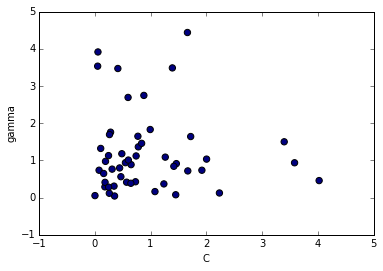

In [19]:
plt.scatter(Cs, gammas, s=40, c=scores)
plt.xlabel("C")
plt.ylabel("gamma")